In [21]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')


<ipython-input-21-ef7e970a5e8f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [20]:
x=[0,1,2,3,4,5]
y=[1,3,3,5,2,2]

In [ ]:
f=interp1d(x,y)
x_lin = np.linspace(0,5,100)
y_lin = f(x_lin)

y_ask = f(3.1)
print(y_ask)

4.699999999999999


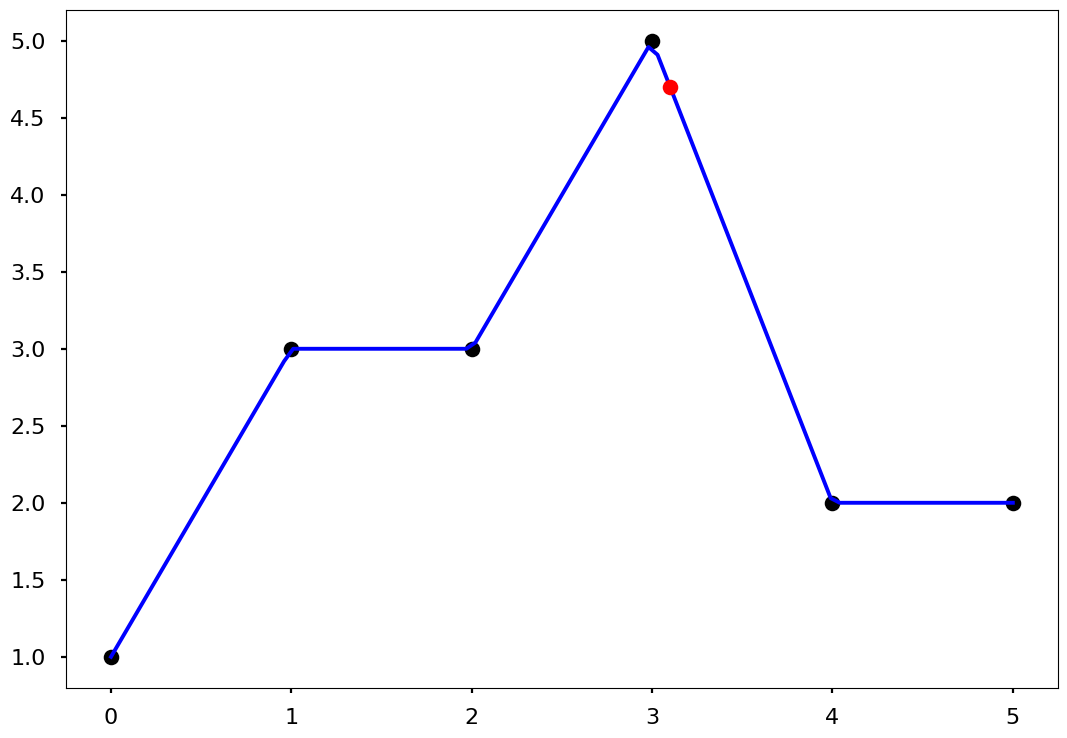

In [ ]:
plt.plot(x,y,'ok')
plt.plot(x_lin,y_lin,'b')
plt.plot(3.1,f(3.1),'ro')
plt.show()

In [ ]:
%matplotlib inline
def divided_diff(x,y):
  n=len(y)
  coef = np.zeros([n,n])
  coef[:,0]=y

  for j in range(1,1):
    for i in range(n-j):
      coef[i][j]= \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef,x_data,x):

  n = len(x_data)-1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

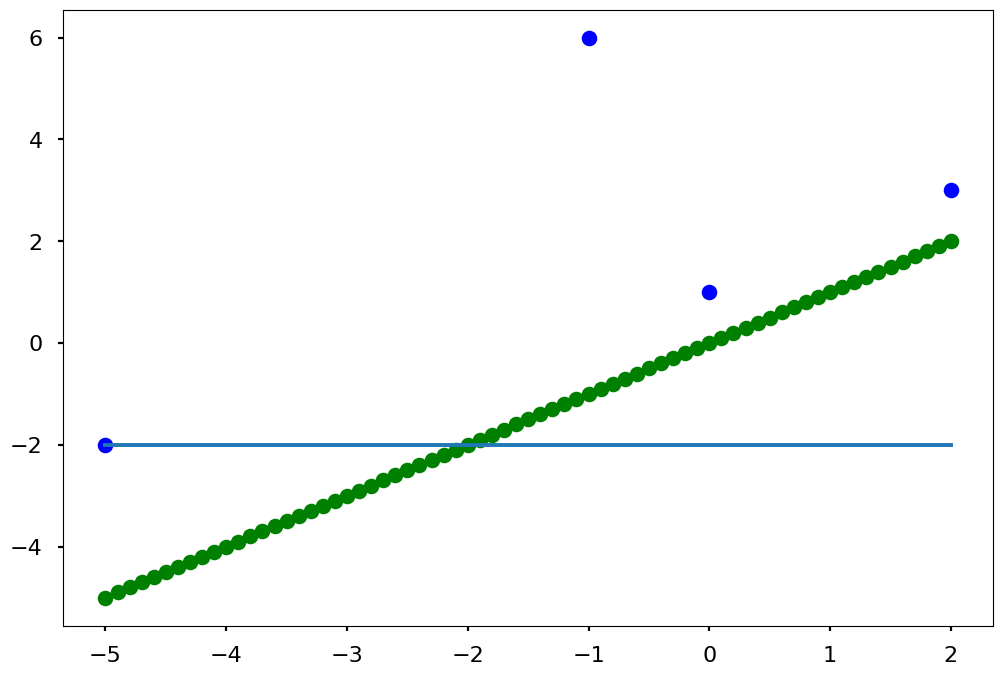

In [29]:
x = np.array([-5,-1,0,2])
y = np.array([-2,6,1,3])

a_s = divided_diff(x,y)[0,:]

x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x, y, 'bo')
plt.plot(x_new, x_new, 'go')
plt.plot(x_new, y_new)

In [ ]:
x = np.linspace(0,1,101)
y = 1 + x + x * np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T

y = y[:, np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.59051044]
 [0.98299118]]


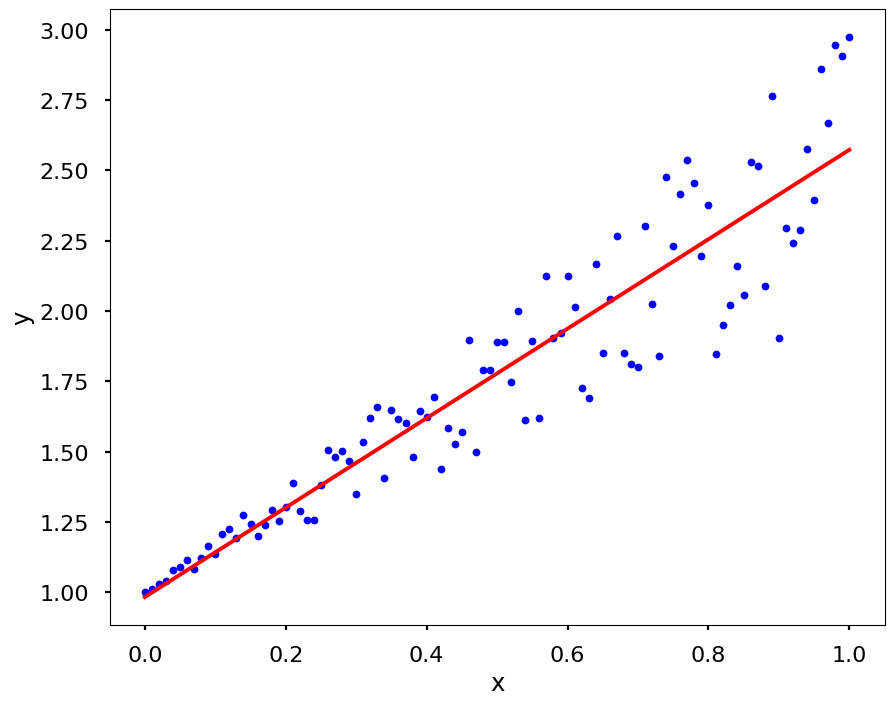

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x,alpha[0]*x + alpha[1],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.59051044]
 [0.98299118]]


In [ ]:
alpha = np.linalg.lstsq(A,y, rcond=None)[0]
print(alpha)

[[1.59051044]
 [0.98299118]]


[1.53466484 0.98624195]


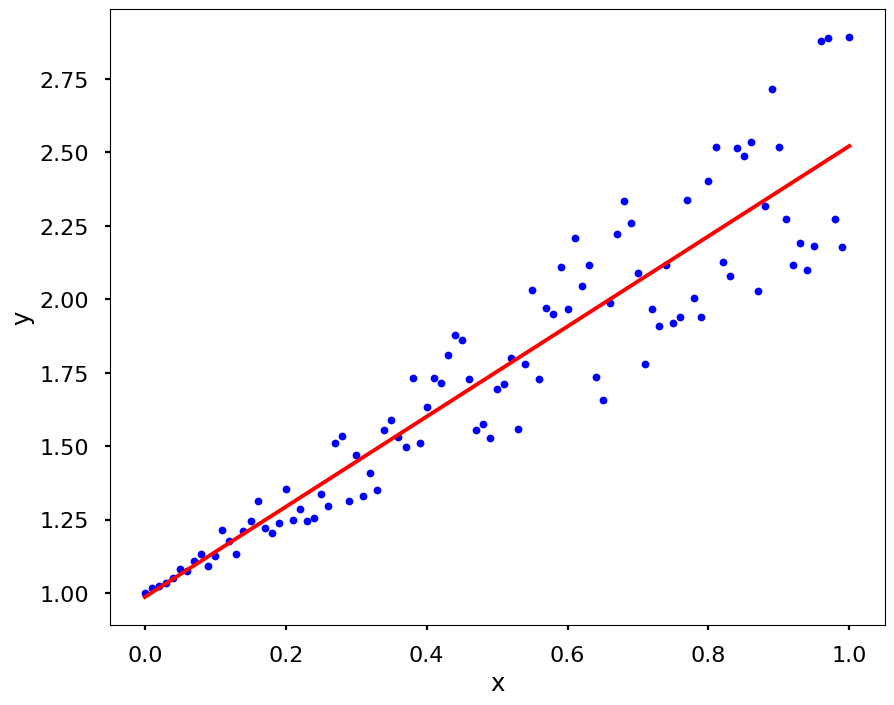

In [26]:
from scipy.optimize import curve_fit

x = np.linspace(0,1,101)
y = 1 + x + x* np.random.random(len(x))

def func(x, a, b):
  y = a*x + b
  return y
alpha = curve_fit(func, xdata=x, ydata=y)[0]
print(alpha)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x,alpha[0]*x + alpha[1],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x=[0,1,2,3,4,5]
y=[1,3,3,5,2,2]

In [ ]:
f = CubicSpline(x, y, bc_type='natural')
x_cub = np.linspace(0,5,100)
y_cub = f(x_cub)

y_ask = f(2.9)
print(y_ask)

5.000368421052631
